# Imports

In [91]:
from matplotlib import pyplot as plt
import numpy as np

# Definitions

In [92]:
# The number of points to generate
N = 1024
COS_THETA_MAX = np.cos(np.pi / 4)

# Source:
# https://extremelearning.com.au/unreasonable-effectiveness-of-quasirandom-sequences/
def r2(n):
    g = 1.32471795724474602596
    a1 = 1.0/g
    a2 = 1.0/(g*g)
    return (0.5+a1*n) % 1, (0.5+a2*n) % 1


def point_in_circle(x, y):
    radius = np.sqrt(x)
    angle = 2.0 * np.pi * y
    return radius * np.cos(angle), radius * np.sin(angle)


def point_in_cosine_distribution(u1, u2):
    sin_theta = np.sqrt(1.0 - u1)
    z = np.sqrt(u1)
    x = np.cos(2.0 * np.pi * u2) * sin_theta
    y = np.sin(2.0 * np.pi * u2) * sin_theta

    return x, y, z


def point_in_cone_distribution(u1, u2, cos_theta_max):
    cos_theta = 1.0 - u1 * (1.0 - cos_theta_max)
    sin_theta = np.sqrt(1.0 - cos_theta * cos_theta)
    phi = 2.0 * np.pi * u2
    x = np.cos(phi) * sin_theta
    y = np.sin(phi) * sin_theta
    z = cos_theta

    return x, y, z

# Demonstrations

## Cartesian to circle

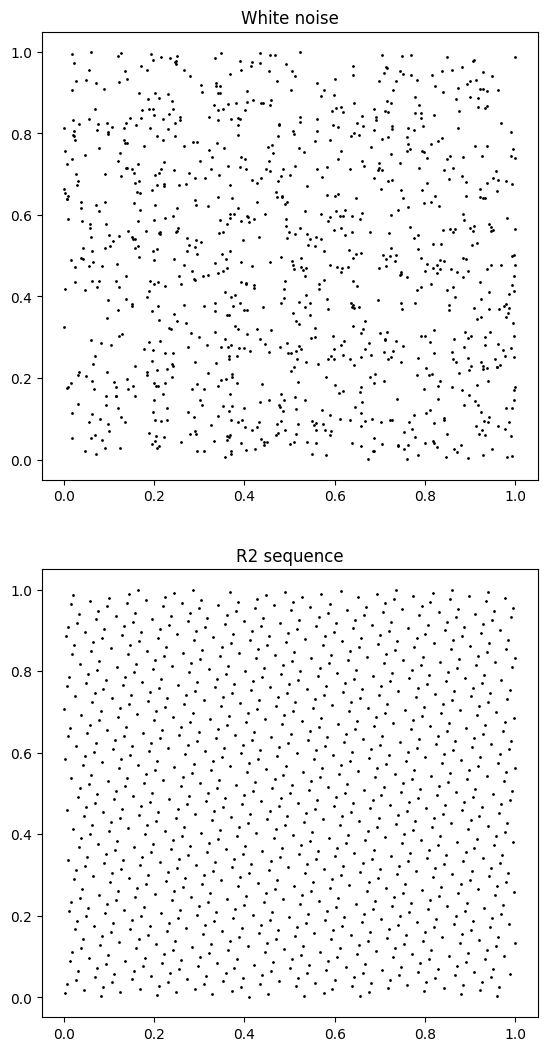

In [93]:
# White noise

u1 = np.random.uniform(0.0, 1.0, N)
u2 = np.random.uniform(0.0, 1.0, N)

# Quasirandom sequence

r2_values = [r2(n) for n in range(N)]

fig, (top, bottom) = plt.subplots(2, 1)
fig.set_figheight(2 * fig.get_figwidth())

top.scatter(u1, u2, s=1, marker='o', color='black')
top.set_title('White noise')

x, y = zip(*r2_values)
bottom.scatter(x, y, s=1, marker='o', color='black')
bottom.set_title('R2 sequence')

plt.show()

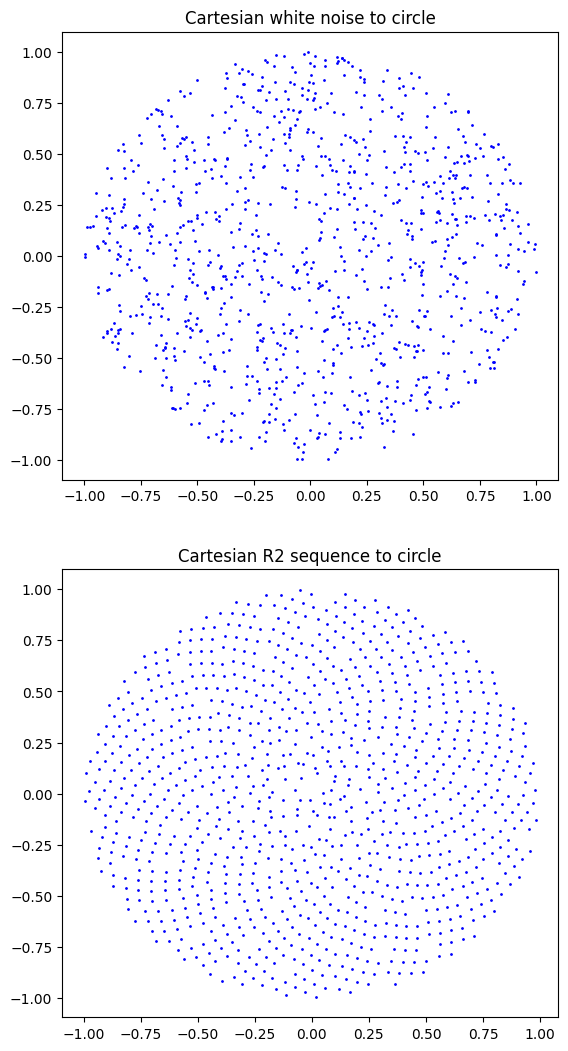

In [94]:

fig, (top, bottom) = plt.subplots(2, 1)
fig.set_figheight(2 * fig.get_figwidth())

points = [point_in_circle(x, y) for x, y in zip(u1, u2)]
x, y = zip(*points)
top.scatter(x, y, s=1, marker='o', color='blue')
top.set_title('Cartesian white noise to circle')

points = [point_in_circle(x, y) for x, y in r2_values]
x, y = zip(*points)

bottom.scatter(x, y, s=1, marker='o', color='blue')
bottom.set_title('Cartesian R2 sequence to circle')

plt.show()

## Cartesian to cosine-weighted hemisphere

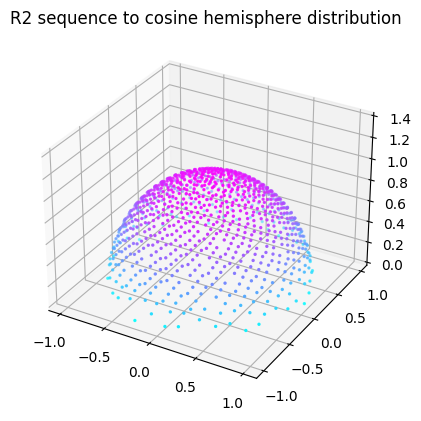

In [95]:
points = [point_in_cosine_distribution(x, y) for x, y in r2_values]
x, y, z = zip(*points)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, s=2, cmap='cool')
ax.set_title('R2 sequence to cosine hemisphere distribution')
ax.set_zlim(0, 1.4)  # Set the z-axis range
plt.show()

## Cartesian to cone distribution

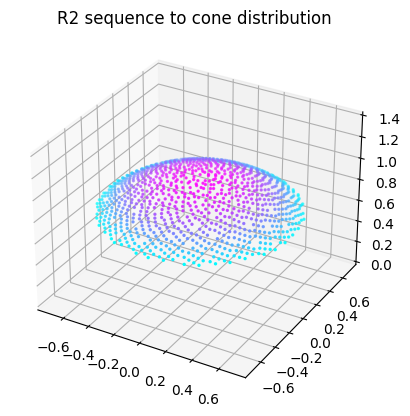

In [102]:
points = [point_in_cone_distribution(x, y, COS_THETA_MAX) for x, y in r2_values]
x, y, z = zip(*points)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, s=2, cmap='cool')
ax.set_title('R2 sequence to cone distribution')
ax.set_zlim(0, 1.4)  # Set the z-axis range
plt.show()

# Shifted R2 sequence

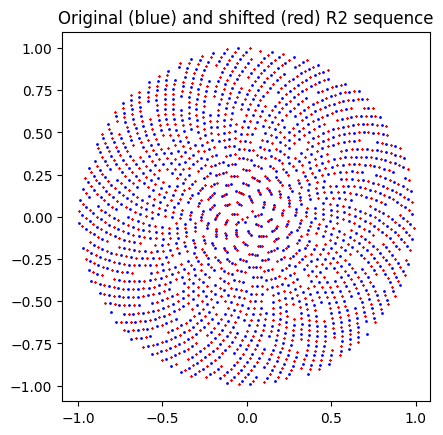

In [97]:

points = [point_in_circle(x, y) for x, y in r2_values]
x, y = zip(*points)
fig = plt.figure()
plt.title('Original (blue) and shifted (red) R2 sequence')
plt.scatter(x, y, s=1, marker='o', color='blue')
plt.gca().set_aspect('equal')

# This is an arbitrary value, but could be looked up from a blue noise mask
shift = 0.5
shifted_r2_values = [((x + shift) % 1, (y + shift) % 1) for x, y in r2_values]
points = [point_in_circle(x, y) for x, y in shifted_r2_values]
x, y = zip(*points)
plt.scatter(x, y, s=1, marker='x', color='red')

plt.show()